In [1]:
# 일반적인 데이터 분류

In [3]:
# 와인 데이터셋 분류

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as pl

In [9]:
rw_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
ww_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";")

In [10]:
rw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
ww_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [12]:
rw_data['type'] = 0             # 섞기 전에 구분할 수 있는 항목 등록
ww_data['type'] = 1

In [13]:
wine_data = pd.concat([rw_data, ww_data])        # 행 합치기

In [14]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [15]:
wine_data.describe()    # 기술 통계량

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


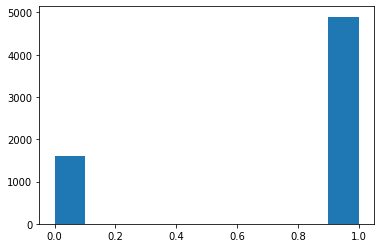

In [17]:
pl.hist(wine_data['type'])
pl.show()

In [18]:
wine_data.info()    # 데이터 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [19]:
# 정규화

wine_norm = (wine_data - wine_data.min()) / (wine_data.max() - wine_data.min())

In [20]:
wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


In [21]:
wine_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
wine_shuffle = wine_norm.sample(frac = 1)    # 비복원 추출로 랜덤하게 섞기

In [23]:
wine_shuffle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3360,0.272727,0.066667,0.295181,0.010736,0.039867,0.038194,0.152074,0.069597,0.255814,0.174157,0.478261,0.666667,1.0
944,0.223140,0.066667,0.198795,0.113497,0.069767,0.052083,0.288018,0.181029,0.434109,0.123596,0.101449,0.666667,1.0
648,0.404959,0.266667,0.180723,0.033742,0.094684,0.031250,0.050691,0.179102,0.472868,0.252809,0.463768,0.666667,0.0
430,0.247934,0.140000,0.301205,0.194785,0.073090,0.163194,0.433180,0.198381,0.286822,0.129213,0.202899,0.333333,1.0
4840,0.247934,0.173333,0.216867,0.127301,0.033223,0.149306,0.281106,0.117023,0.434109,0.073034,0.572464,0.666667,1.0


In [24]:
np_wine = wine_shuffle.to_numpy()

In [26]:
np_wine[ :5]

array([[0.27272727, 0.06666667, 0.29518072, 0.0107362 , 0.03986711,
        0.03819444, 0.15207373, 0.06959707, 0.25581395, 0.1741573 ,
        0.47826087, 0.66666667, 1.        ],
       [0.2231405 , 0.06666667, 0.19879518, 0.11349693, 0.06976744,
        0.05208333, 0.28801843, 0.1810295 , 0.43410853, 0.12359551,
        0.10144928, 0.66666667, 1.        ],
       [0.40495868, 0.26666667, 0.18072289, 0.03374233, 0.09468439,
        0.03125   , 0.05069124, 0.1791016 , 0.47286822, 0.25280899,
        0.46376812, 0.66666667, 0.        ],
       [0.24793388, 0.14      , 0.30120482, 0.19478528, 0.0730897 ,
        0.16319444, 0.43317972, 0.19838057, 0.28682171, 0.12921348,
        0.20289855, 0.33333333, 1.        ],
       [0.24793388, 0.17333333, 0.21686747, 0.12730061, 0.03322259,
        0.14930556, 0.28110599, 0.11702333, 0.43410853, 0.07303371,
        0.57246377, 0.66666667, 1.        ]])

In [29]:
tn = int(len(np_wine) * 0.8)

In [31]:
train = np_wine[ :tn]    # 학습데이터 80%
test = np_wine[tn: ]     # 검정데이터 20%

In [34]:
xtr, ytr = train[ : , :-1], train[ : ,-1]    # 데이터, 라벨 분리
xte, yte = test[ : , :-1], test[ : ,-1]

In [37]:
lbl_tr = tf.keras.utils.to_categorical(ytr, num_classes = 2)    # 원핫 인코딩
lbl_te = tf.keras.utils.to_categorical(yte, num_classes = 2)

In [41]:
md = tf.keras.Sequential([    # 모델 구성
    
  tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12, )),
  tf.keras.layers.Dense(units = 24, activation = 'relu'),
  tf.keras.layers.Dense(units = 12, activation = 'relu'),
  tf.keras.layers.Dense(units = 2, activation = 'softmax')

])

md.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'categorical_crossentropy', metrics = ['accuracy'])
md.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 48)                624       
                                                                 
 dense_5 (Dense)             (None, 24)                1176      
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [42]:
hist = md.fit(xtr, lbl_tr, epochs = 25, batch_size = 32, validation_split = 0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.1730 - accuracy: 0.9428 - val_loss: 0.0839 - val_accuracy: 0.9731
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9815 - val_loss: 0.0517 - val_accuracy: 0.9869
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9882 - val_loss: 0.0509 - val_accuracy: 0.9846
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0590 - val_accuracy: 0.9800
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9887 - val_loss: 0.0488 - val_accuracy: 0.9877
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9910 - val_loss: 0.0372 - val_accuracy: 0.9915
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9897 - val_loss: 0.0435 - val_accuracy: 0.9831
Epoch 

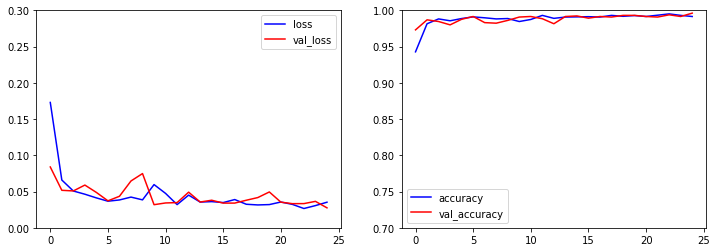

In [50]:
pl.figure(figsize = (12, 4))

pl.subplot(1, 2, 1)
pl.plot(hist.history['loss'], 'b-', label = "loss")
pl.plot(hist.history['val_loss'], 'r-', label = "val_loss")
pl.ylim(0.0, 0.3)
pl.legend()

pl.subplot(1, 2, 2)
pl.plot(hist.history['accuracy'], 'b-', label = "accuracy")
pl.plot(hist.history['val_accuracy'], 'r-', label = "val_accuracy")
pl.ylim(0.7, 1.0)
pl.legend()

pl.show()

In [49]:
md.evaluate(xte, lbl_te)    # 검정데이터로 모델 평가

41/41 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9938


[0.028940293937921524, 0.9938461780548096]